<a href="https://colab.research.google.com/github/kamrulhuda/Time_Series_Analysis/blob/main/LG_Time_Series_Functions_for_Sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://www.tensorflow.org/tutorials/structured_data/images/raw_window_1h.png
!wget https://www.tensorflow.org/tutorials/structured_data/images/raw_window_24h.png
!wget https://www.tensorflow.org/tutorials/structured_data/images/split_window.png

--2021-05-27 17:17:15--  https://www.tensorflow.org/tutorials/structured_data/images/raw_window_1h.png
Resolving www.tensorflow.org (www.tensorflow.org)... 142.250.128.102, 142.250.128.138, 142.250.128.139, ...
Connecting to www.tensorflow.org (www.tensorflow.org)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7534 (7.4K) [image/png]
Saving to: ‘raw_window_1h.png’

raw_window_1h.png   100%[===================>]   7.36K  --.-KB/s    in 0s      

2021-05-27 17:17:16 (69.5 MB/s) - ‘raw_window_1h.png’ saved [7534/7534]

--2021-05-27 17:17:16--  https://www.tensorflow.org/tutorials/structured_data/images/raw_window_24h.png
Resolving www.tensorflow.org (www.tensorflow.org)... 142.250.148.100, 142.250.148.102, 142.250.148.139, ...
Connecting to www.tensorflow.org (www.tensorflow.org)|142.250.148.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9301 (9.1K) [image/png]
Saving to: ‘raw_window_24h.png’

raw_window_24h.png  10

In [5]:
!pip install pymatreader
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from pymatreader import read_mat
import os
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
#import plotlyhttp://localhost:8889/notebooks/Panasonic_18650_Data_analysis.ipynb#
import numpy as np
import csv
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures 

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

  Created wheel for pymatreader: filename=pymatreader-0.0.24-cp37-none-any.whl size=8598 sha256=14296ae56df504e832b33fd94846e3d12fe0bc2554ff8b10ac91bbc5250b386f
  Stored in directory: /root/.cache/pip/wheels/9b/0f/ca/b25bef5f38f5b6b4c36438f6225961d393b51a02db087fc8b1
Successfully built pymatreader


In [ ]:
from google.colab import files
uploaded = files.upload()




In [64]:
Charge6 = read_mat('10-29-18_11.15 551_Charge6.mat')
Charge6_df= pd.DataFrame(Charge6['meas'])

SOC=[]
for i in Charge6_df.index:
   x= 1 - Charge6_df['Ah'].values[-i]/3
   SOC.append(x)
#print(SOC)
Charge6_df['SOC']= SOC

In [ ]:
#Creating the Dataframe for Mixed 1 drive cycle
Mixed1_25degC = read_mat('10-29-18_14.41 551_Mixed1_25degC_LGHG2.mat')
Mixed1_25degC_df= pd.DataFrame(Mixed1_25degC['meas'])

#Calculating SOC: In case of Discahrge test, initial SOC is 100%
Mixed1_25degC_df['SOC']= 1+ (Mixed1_25degC_df['Ah']/3)

In [ ]:
#Creating the Dataframe for Charge 7 cycle
Charge7 = read_mat('10-29-18_16.50 551_Charge7.mat')
Charge7_df= pd.DataFrame(Charge6['meas'])


#Calculating SOC: In case of cahrge test, final SOC is 100%
SOC=[]
for i in Charge7_df.index:
   x= 1 - Charge7_df['Ah'].values[-i]/3
   SOC.append(x)
#print(SOC)
Charge7_df['SOC']= SOC

In [ ]:
#Creating the Dataframe for Mixed 1 drive cycle
Mixed2_25degC = read_mat('10-29-18_20.16 551_Mixed2_25degC_LGHG2.mat')
Mixed2_25degC_df= pd.DataFrame(Mixed2_25degC['meas'])

#Resampling to 1 HZ
#Mixed2_25degC_df ['TimeStamp'] = pd.to_datetime(Mixed2_25degC_df['TimeStamp'])
#Mixed2_25degC_df.groupby(['Ah']).resample('1000L',on='TimeStamp').mean()

#Calculating SOC: In case of Discahrge test, initial SOC is 100%
Mixed2_25degC_df['SOC']= 1+(Mixed2_25degC_df['Ah']/3)

In [ ]:
train_data= [Charge6_df,Mixed1_25degC_df,Charge7_df,Mixed2_25degC_df]
train_data=pd.concat(train_data)
train_data['TimeStamp']= pd.to_datetime(train_data['TimeStamp'],infer_datetime_format=True)

In [66]:
train_data

,Time,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,SOC
0,0.000000,2018-10-29 11:15:57,3.22633,0.0,0.00000,6,0.0,24.08130,1.000000
1,59.997995,2018-10-29 11:16:57,3.22734,0.0,0.00000,6,0.0,23.87099,0.130327
2,119.998997,2018-10-29 11:17:57,3.22835,0.0,0.00000,6,0.0,23.87099,0.130327
3,179.997002,2018-10-29 11:18:57,3.22919,0.0,0.00000,6,0.0,23.87099,0.130327
4,239.999000,2018-10-29 11:19:57,3.23003,0.0,0.00000,6,0.0,23.87099,0.130327
...,...,...,...,...,...,...,...,...,...
79167,7916.623002,2018-10-29 22:28:12,3.21217,0.0,-2.59028,8,0.0,24.08130,0.136573
79168,7916.722006,2018-10-29 22:28:12,3.21217,0.0,-2.59028,8,0.0,24.08130,0.136573
79169,7916.822005,2018-10-29 22:28:12,3.21217,0.0,-2.59028,8,0.0,24.08130,0.136573
79170,7916.923001,2018-10-29 22:28:12,3.21217,0.0,-2.59028,8,0.0,24.08130,0.136573


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156819 entries, 0 to 79171
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Time               156819 non-null  float64       
 1   TimeStamp          156819 non-null  datetime64[ns]
 2   Voltage            156819 non-null  float64       
 3   Current            156819 non-null  float64       
 4   Ah                 156819 non-null  float64       
 5   Wh                 156819 non-null  uint8         
 6   Power              156819 non-null  float64       
 7   Battery_Temp_degC  156819 non-null  float64       
 8   SOC                156819 non-null  float64       
dtypes: datetime64[ns](1), float64(7), uint8(1)
memory usage: 10.9 MB


In [67]:
train_data[['Time','TimeStamp', 'Voltage', 'Current','Battery_Temp_degC', 'Ah', 'SOC']]

,Time,TimeStamp,Voltage,Current,Battery_Temp_degC,Ah,SOC
0,0.000000,2018-10-29 11:15:57,3.22633,0.0,24.08130,0.00000,1.000000
1,59.997995,2018-10-29 11:16:57,3.22734,0.0,23.87099,0.00000,0.130327
2,119.998997,2018-10-29 11:17:57,3.22835,0.0,23.87099,0.00000,0.130327
3,179.997002,2018-10-29 11:18:57,3.22919,0.0,23.87099,0.00000,0.130327
4,239.999000,2018-10-29 11:19:57,3.23003,0.0,23.87099,0.00000,0.130327
...,...,...,...,...,...,...,...
79167,7916.623002,2018-10-29 22:28:12,3.21217,0.0,24.08130,-2.59028,0.136573
79168,7916.722006,2018-10-29 22:28:12,3.21217,0.0,24.08130,-2.59028,0.136573
79169,7916.822005,2018-10-29 22:28:12,3.21217,0.0,24.08130,-2.59028,0.136573
79170,7916.923001,2018-10-29 22:28:12,3.21217,0.0,24.08130,-2.59028,0.136573


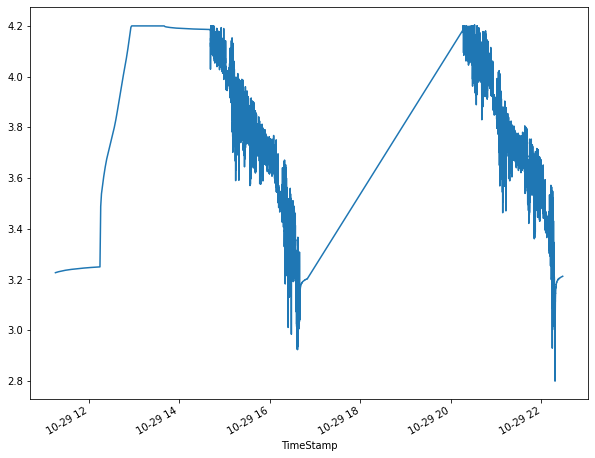

In [68]:
train_data.set_index('TimeStamp')['Voltage'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efceb603590>,
      dtype=object)

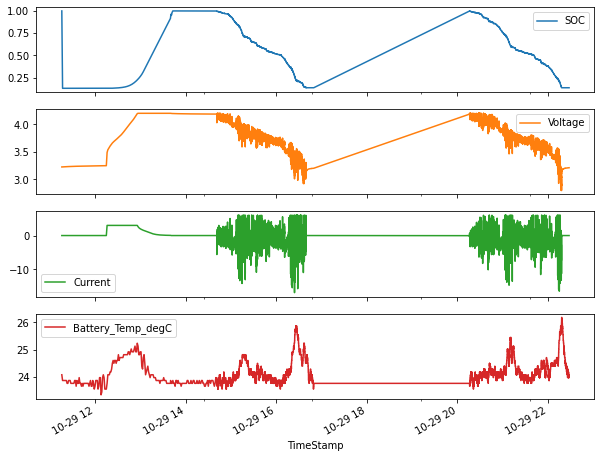

In [69]:
train_data.set_index('TimeStamp')[['SOC', 'Voltage', 'Current','Battery_Temp_degC']].plot(subplots=True)

In [70]:
train_data.count()

Time                 156819
TimeStamp            156819
Voltage              156819
Current              156819
Ah                   156819
Wh                   156819
Power                156819
Battery_Temp_degC    156819
SOC                  156819
dtype: int64

In [71]:
features=train_data[['SOC','Voltage', 'Current', 'Battery_Temp_degC']].to_numpy().tolist()
target=train_data['SOC'].tolist()

In [72]:
features[0:11]

[[1.0, 3.22633, 0.0, 24.0813],
 [0.1303266666666666, 3.22734, 0.0, 23.87099],
 [0.1303266666666666, 3.22835, 0.0, 23.87099],
 [0.1303266666666666, 3.22919, 0.0, 23.87099],
 [0.1303266666666666, 3.23003, 0.0, 23.87099],
 [0.1303266666666666, 3.23071, 0.0, 23.87099],
 [0.1303266666666666, 3.23155, 0.0, 23.87099],
 [0.1303266666666666, 3.23222, 0.0, 23.76583],
 [0.1303266666666666, 3.2329, 0.0, 23.76583],
 [0.1303266666666666, 3.2334, 0.0, 23.87099],
 [0.1303266666666666, 3.23408, 0.0, 23.87099]]

In [73]:
target[0:11]

[1.0,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666,
 0.1303266666666666]

In [74]:
display(Image('raw_window_1h.png'))
print("===========================================================================")
display(Image('split_window.png'))
print("===========================================================================")
display(Image('raw_window_24h.png'))

In [75]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [76]:
ts_generator[0]

(array([[[ 1.        ,  3.22633   ,  0.        , 24.0813    ],
         [ 0.13032667,  3.22734   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ]]]),
 array([0.13032667]))

In [77]:
ts_generator[0][0][0].shape

(6, 4)

In [78]:
ts_generator[1]

(array([[[ 0.13032667,  3.22734   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23155   ,  0.        , 23.87099   ]]]),
 array([0.13032667]))

In [79]:
ts_generator[2]

(array([[[ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23155   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23222   ,  0.        , 23.76583   ]]]),
 array([0.13032667]))

In [80]:
len(ts_generator)

156813



```
Input - 1,2,3,4,5,6,7,8,9

Sliding window (window size 3, stride 1) - 1,2,3    2,3,4   4,5,6

Sliding window (window size 3, stride 2) - 1,2,3    3,4,5   7,8,9

Tumbling window (Window size 3)   - 1,2,3   4,5,6   7,8,9


```



In [81]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=2)

In [82]:
len(ts_generator)

78407

In [83]:
ts_generator[0]

(array([[[ 1.        ,  3.22633   ,  0.        , 24.0813    ],
         [ 0.13032667,  3.22734   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ]]]),
 array([0.13032667]))

In [84]:
ts_generator[1]

(array([[[ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23155   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23222   ,  0.        , 23.76583   ]]]),
 array([0.13032667]))

In [86]:
pd.concat([train_data['SOC'],train_data['SOC'].shift(-1), train_data['SOC'].shift(-2)],axis=1)

,SOC,SOC,SOC
0,1.000000,0.130327,0.130327
1,0.130327,0.130327,0.130327
2,0.130327,0.130327,0.130327
3,0.130327,0.130327,0.130327
4,0.130327,0.130327,0.130327
...,...,...,...
79167,0.136573,0.136573,0.136573
79168,0.136573,0.136573,0.136573
79169,0.136573,0.136573,0.136573
79170,0.136573,0.136573,NaN


In [89]:
multi_target=pd.concat([train_data['SOC'],train_data['SOC'].shift(-1), train_data['SOC'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [90]:
multi_target[0:13]

[[1.0, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666],
 [0.1303266666666666, 0.1303266666666666, 0.1303266666666666]]

In [91]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [92]:
ts_generator[0]

(array([[[ 1.        ,  3.22633   ,  0.        , 24.0813    ],
         [ 0.13032667,  3.22734   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22835   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.22919   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23003   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23071   ,  0.        , 23.87099   ]]]),
 array([[0.13032667, 0.13032667, 0.13032667]]))

In [93]:
ts_generator[1]

(array([[[ 0.13032667,  3.23155   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23222   ,  0.        , 23.76583   ],
         [ 0.13032667,  3.2329    ,  0.        , 23.76583   ],
         [ 0.13032667,  3.2334    ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23408   ,  0.        , 23.87099   ],
         [ 0.13032667,  3.23458   ,  0.        , 23.87099   ]]]),
 array([[0.13032667, 0.13032667, 0.13032667]]))